In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
import tensorflow as tf
import pickle

C:\Users\eddcr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


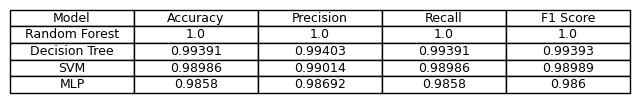

In [78]:
# Load landmark data from CSV
df = pd.read_csv('coords-full.csv')

# Assuming your CSV has columns for coordinates and labels
landmarks = df.drop(columns=['class']).values
labels = df['class'].values

accuracy_values = []

# Define parameters
epochs = 10

# Data splitting
landmarks_train, landmarks_test, labels_train, labels_test = train_test_split(
    landmarks, labels, test_size=0.3, random_state=42
)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(landmarks_train, labels_train)
rf_predictions = rf_model.predict(landmarks_test)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(landmarks_train, labels_train)
dt_predictions = dt_model.predict(landmarks_test)

# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', C=1.0, decision_function_shape='ovr', probability=True)
svm_model.fit(landmarks_train, labels_train)
svm_predictions = svm_model.predict(landmarks_test)

# Multilayer Perceptron (MLP) using scikit-learn
mlp_model = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=epochs)
mlp_model.fit(landmarks_train, labels_train)
mlp_predictions = mlp_model.predict(landmarks_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(labels_test, rf_predictions)
rf_precision = precision_score(labels_test, rf_predictions, average='weighted')
rf_recall = recall_score(labels_test, rf_predictions, average='weighted')
rf_f1 = f1_score(labels_test, rf_predictions, average='weighted')

# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(labels_test, dt_predictions)
dt_precision = precision_score(labels_test, dt_predictions, average='weighted')
dt_recall = recall_score(labels_test, dt_predictions, average='weighted')
dt_f1 = f1_score(labels_test, dt_predictions, average='weighted')

# Evaluate the SVM model
svm_accuracy = accuracy_score(labels_test, svm_predictions)
svm_precision = precision_score(labels_test, svm_predictions, average='weighted')
svm_recall = recall_score(labels_test, svm_predictions, average='weighted')
svm_f1 = f1_score(labels_test, svm_predictions, average='weighted')

# Evaluate the MLP model
mlp_accuracy = accuracy_score(labels_test, mlp_predictions)
mlp_precision = precision_score(labels_test, mlp_predictions, average='weighted')
mlp_recall = recall_score(labels_test, mlp_predictions, average='weighted')
mlp_f1 = f1_score(labels_test, mlp_predictions, average='weighted')

rf_accuracy = round(rf_accuracy, 5)
rf_precision = round(rf_precision, 5)
rf_recall = round(rf_recall, 5)
rf_f1 = round(rf_f1, 5)

dt_accuracy = round(dt_accuracy, 5)
dt_precision = round(dt_precision, 5)
dt_recall = round(dt_recall, 5)
dt_f1 = round(dt_f1, 5)

svm_accuracy = round(svm_accuracy, 5)
svm_precision = round(svm_precision, 5)
svm_recall = round(svm_recall, 5)
svm_f1 = round(svm_f1, 5)

mlp_accuracy = round(mlp_accuracy, 5)
mlp_precision = round(mlp_precision, 5)
mlp_recall = round(mlp_recall, 5)
mlp_f1 = round(mlp_f1, 5)

# Create a DataFrame for better formatting
table_data = [
    ["Random Forest", rf_accuracy, rf_precision, rf_recall, rf_f1],
    ["Decision Tree", dt_accuracy, dt_precision, dt_recall, dt_f1],
    ["SVM", svm_accuracy, svm_precision, svm_recall, svm_f1],
    ["MLP", mlp_accuracy, mlp_precision, mlp_recall, mlp_f1]
]

df_table = pd.DataFrame(table_data, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

# Plot table and save as an image
fig, ax = plt.subplots(figsize=(8, 1))
ax.axis('off')
ax.table(cellText=df_table.values, colLabels=df_table.columns, cellLoc='center', loc='center')

plt.show()


In [73]:
table_data

[['Random Forest', 0.99772, 0.99773, 0.99772, 0.99771],
 ['Decision Tree', 0.98633, 0.98642, 0.98633, 0.98637],
 ['SVM', 0.9738, 0.97386, 0.9738, 0.97344],
 ['MLP', 0.98747, 0.98748, 0.98747, 0.9874]]

In [79]:
with open('18amodel.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [ ]:
with open('rf_model.pkl', 'rb') as file:
    loaded_rf_model = pickle.load(file)